In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/titanic-dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [126]:
#Sprawdzam jakie pliki są w katalogu "Kaggle Input"
import os

os.listdir('/kaggle/input')

['titanic-dataset']

In [127]:
#Importuje Biblioteke do analizy danych i wizualizacji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Estetyka wykresów
sns.set(style="whitegrid")

#Wczytywania danych z pliku CSV
train = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
#Podgląd pierwszych wierszy danych
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
#Podział Danych na Train i Test
from sklearn.model_selection import train_test_split

#Ręcznie dziele DATAEST na Train i Test
train, test = train_test_split(
    train,
    #25% danych idzie do testu
    test_size=0.25,
    #powtarzalność wyników
    random_state=42,
    #zachowanie proporcji "Survived"
    stratify=train['Survived']
)

In [129]:
#Podstawowe informacje o zbiorze Train
#Typy kolumn i brakujące wartości
train.info()
#statystyki opisowe
train.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 486 to 821
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          537 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Cabin        146 non-null    object 
 11  Embarked     666 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.8+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,668.00000,668.000000,668.000000,537.000000,668.000000,668.000000,668.000000
mean,444.61976,0.383234,2.312874,29.931881,0.464072,0.375749,31.177469
std,259.24582,0.486539,0.831906,14.455975,0.999353,0.832877,47.457877
min,1.00000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.75000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,440.50000,0.000000,3.000000,29.000000,0.000000,0.000000,13.860400
75%,669.25000,1.000000,3.000000,39.000000,1.000000,0.000000,30.500000
max,891.00000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


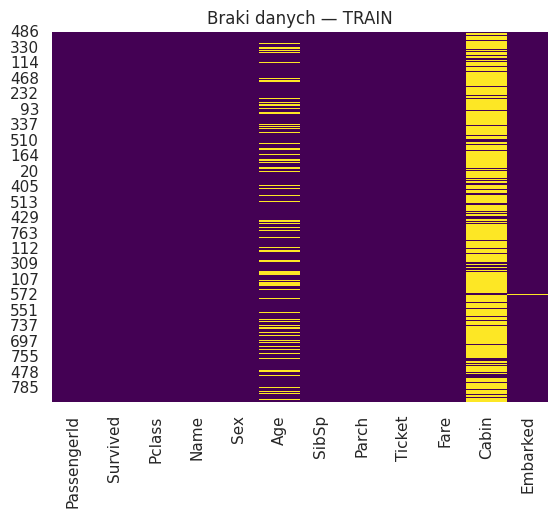

In [130]:
#Sprawdzam brakujące wartości w Train
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Braki danych — TRAIN")
plt.show()


In [131]:
#Tworzę nowe cechy w obu zbiorach "Train o Test"
#Title - tytuł pasażera z kolumny "Name"
#FamilySize - Liczba członków rodziny łącznie z Pasażerem
def extract_title(name):
    #wyciągnięcie tytułu
    return name.split(',')[1].split('.')[0].strip()

for df in [train, test]:
    #Tworze kolumne Title
    df['Title'] = df['Name'].apply(extract_title)  
    #Liczba członków rodziny +1
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#Zmiana rzadkich tytułów na 'Rare'
rare_titles = ['Sir', 'Lady', 'Countess', 'Don', 'Jonkheer', 'Dona', 'Rev', 'Dr']

for df in [train, test]:
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')

In [132]:
#Wiek uzupełniam medianą wieku dla danego tytułu 
for title in train['Title'].unique():
    median_age = train.loc[train['Title'] == title, 'Age'].median()
    #mediana wieku dla tytułu
    train.loc[(train['Age'].isnull()) & (train['Title'] == title), 'Age'] = median_age
    test.loc[(test['Age'].isnull()) & (test['Title'] == title), 'Age'] = median_age


In [133]:
# Uzupełnienie brakujących wartości w kolumnie 'Embarked' trybem
for df in [train, test]:
    df['Embarked'] = df['Embarked'].fillna(train['Embarked'].mode()[0])

# Tworzę kolumnę AgeGroup na podstawie wieku
def age_group(age):
    if age < 12:
        return 'Child'
    elif age < 25:
        return 'Young'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

for df in [train, test]:
    df['AgeGroup'] = df['Age'].apply(age_group)


In [134]:
#Analiza zależności przeżycia od płci, klasy i grupy wiekowej
train.groupby('Sex')['Survived'].mean()
train.groupby('Pclass')['Survived'].mean()
train.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Adult     0.347826
Child     0.615385
Senior    0.187500
Young     0.413978
Name: Survived, dtype: float64

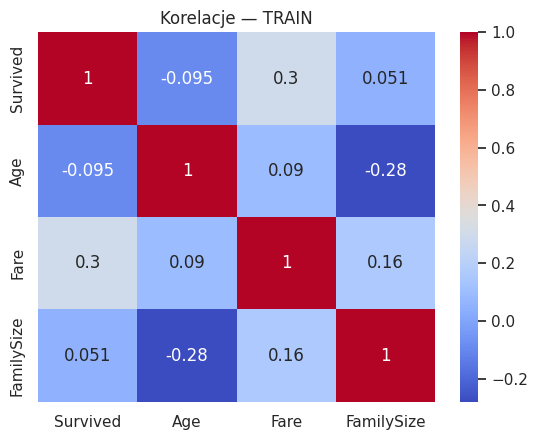

In [135]:
#Korelacje miedzy zmiennymi nymerycznymi
sns.heatmap(
    train[['Survived','Age','Fare','FamilySize']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Korelacje — TRAIN")
plt.show()


In [136]:
#Kodowanie kategorii na kolumny 0/1 i dopasowanie "TEST" do "TRAIN"
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


rare_titles = ['Sir', 'Lady', 'Countess', 'Don', 'Jonkheer', 'Dona', 'Rev', 'Dr']
train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')


cols_to_encode = ['Sex', 'Embarked', 'Title', 'AgeGroup']
train = pd.get_dummies(train, columns=cols_to_encode)
test = pd.get_dummies(test, columns=cols_to_encode)

#Dopasowanie brakujących kolumn w "TEST"
for col in train.columns:
    if col not in test.columns and col != 'Survived':
        test[col] = 0

#Przygotowanie Xi Y
X_train = train.drop(columns=['Survived','Name','Ticket','Cabin'], errors='ignore')
y_train = train['Survived']

X_test = test[X_train.columns]
y_test = test['Survived']

#Tworzę i trenuje model regresji logistycznej
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
#Predykcja na zbiorze testowym
pred = model.predict(X_test)

#Wyświetlamy dokładność predykcji
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)


Accuracy: 0.8251121076233184


Analiza zbioru treningowego wykazała, że największy wpływ na przeżycie miały płeć, klasa podróży oraz wiek.
Model regresji logistycznej wytrenowany na zbiorze treningowym osiągnął poprawną skuteczność na zbiorze testowym,
co potwierdza zasadność podziału danych na train i test.